# Loan Eligibity Machine Learning Project
## End to End Machine Learning Project to determine based on couple of parameters whether a person is eligible for loan application or not

In [140]:
# Importing necessaru libraries
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pickle as pkl

%matplotlib inline

# Imporing necessary scikit-learn data processing packages
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# Sklearn packages to build our model
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Sklearn packages for model evaluation
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.pipeline import Pipeline

# The Guideline or the Pipeline Im following build out my model
* Import data and preprocess it
* Transform where necessary and Impute where necessary
* Do Exploratory Data Analysis
* Model selection
* Experimenation
* Evaluation
* Completing and building the model with Pickle

## Importing Data

In [2]:
df = pd.read_csv("loan_data.csv")
df.head()

person_age person_gender person_education  person_income  person_emp_exp  \
0        22.0        female           Master        71948.0               0   
1        21.0        female      High School        12282.0               0   
2        25.0        female      High School        12438.0               3   
3        23.0        female         Bachelor        79753.0               0   
4        24.0          male           Master        66135.0               1   

  person_home_ownership  loan_amnt loan_intent  loan_int_rate  \
0                  RENT    35000.0    PERSONAL          16.02   
1                   OWN     1000.0   EDUCATION          11.14   
2              MORTGAGE     5500.0     MEDICAL          12.87   
3                  RENT    35000.0     MEDICAL          15.23   
4                  RENT    35000.0     MEDICAL          14.27   

   loan_percent_income  cb_person_cred_hist_length  credit_score  \
0                 0.49                         3.0           561   
1                 0.08                         2.0           504   
2                 0.44                         3.0           635   
3                 0.44                         2.0           675   
4                 0.53                         4.0           586   

  previous_loan_defaults_on_file  loan_status  
0                             No            1  
1                            Yes            0  
2                             No            1  
3                             No            1  
4                             No            1

In [3]:
# Checking top see if there's a na value or empty row or data
df.isna().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [4]:
# Checking for the datatypes we are working with
df.dtypes

person_age                        float64
person_gender                      object
person_education                   object
person_income                     float64
person_emp_exp                      int64
person_home_ownership              object
loan_amnt                         float64
loan_intent                        object
loan_int_rate                     float64
loan_percent_income               float64
cb_person_cred_hist_length        float64
credit_score                        int64
previous_loan_defaults_on_file     object
loan_status                         int64
dtype: object

In [5]:
# Listing all the named columns to rename
df.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

# Exploratory Data Analysis

In [6]:
# Renaming columns for better reference
df = df.rename(columns={"person_age": "age", "person_gender": "sex", "person_education": "edu_lev", "person_income": "income", "person_emp_exp": "exp", "person_home_ownership": "home_status", "cb_person_cred_hist_length": "cred_hist","previous_loan_defaults_on_file": "prev_loan", "loan_status": "target"})

In [7]:
df.head()

age     sex      edu_lev   income  exp home_status  loan_amnt loan_intent  \
0  22.0  female       Master  71948.0    0        RENT    35000.0    PERSONAL   
1  21.0  female  High School  12282.0    0         OWN     1000.0   EDUCATION   
2  25.0  female  High School  12438.0    3    MORTGAGE     5500.0     MEDICAL   
3  23.0  female     Bachelor  79753.0    0        RENT    35000.0     MEDICAL   
4  24.0    male       Master  66135.0    1        RENT    35000.0     MEDICAL   

   loan_int_rate  loan_percent_income  cred_hist  credit_score prev_loan  \
0          16.02                 0.49        3.0           561        No   
1          11.14                 0.08        2.0           504       Yes   
2          12.87                 0.44        3.0           635        No   
3          15.23                 0.44        2.0           675        No   
4          14.27                 0.53        4.0           586        No   

   target  
0       1  
1       0  
2       1  
3       1  
4       1

In [8]:
df.describe()

age        income           exp     loan_amnt  loan_int_rate  \
count  45000.000000  4.500000e+04  45000.000000  45000.000000   45000.000000   
mean      27.764178  8.031905e+04      5.410333   9583.157556      11.006606   
std        6.045108  8.042250e+04      6.063532   6314.886691       2.978808   
min       20.000000  8.000000e+03      0.000000    500.000000       5.420000   
25%       24.000000  4.720400e+04      1.000000   5000.000000       8.590000   
50%       26.000000  6.704800e+04      4.000000   8000.000000      11.010000   
75%       30.000000  9.578925e+04      8.000000  12237.250000      12.990000   
max      144.000000  7.200766e+06    125.000000  35000.000000      20.000000   

       loan_percent_income     cred_hist  credit_score        target  
count         45000.000000  45000.000000  45000.000000  45000.000000  
mean              0.139725      5.867489    632.608756      0.222222  
std               0.087212      3.879702     50.435865      0.415744  
min               0.000000      2.000000    390.000000      0.000000  
25%               0.070000      3.000000    601.000000      0.000000  
50%               0.120000      4.000000    640.000000      0.000000  
75%               0.190000      8.000000    670.000000      0.000000  
max               0.660000     30.000000    850.000000      1.000000

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  45000 non-null  float64
 1   sex                  45000 non-null  object 
 2   edu_lev              45000 non-null  object 
 3   income               45000 non-null  float64
 4   exp                  45000 non-null  int64  
 5   home_status          45000 non-null  object 
 6   loan_amnt            45000 non-null  float64
 7   loan_intent          45000 non-null  object 
 8   loan_int_rate        45000 non-null  float64
 9   loan_percent_income  45000 non-null  float64
 10  cred_hist            45000 non-null  float64
 11  credit_score         45000 non-null  int64  
 12  prev_loan            45000 non-null  object 
 13  target               45000 non-null  int64  
dtypes: float64(6), int64(3), object(5)
memory usage: 4.8+ MB


In [10]:
# Transforming our `sex` column to values using the `dummies` function
dummies_df = pd.get_dummies(df, columns=["sex"], dtype="uint8")

In [11]:
df.head()

age     sex      edu_lev   income  exp home_status  loan_amnt loan_intent  \
0  22.0  female       Master  71948.0    0        RENT    35000.0    PERSONAL   
1  21.0  female  High School  12282.0    0         OWN     1000.0   EDUCATION   
2  25.0  female  High School  12438.0    3    MORTGAGE     5500.0     MEDICAL   
3  23.0  female     Bachelor  79753.0    0        RENT    35000.0     MEDICAL   
4  24.0    male       Master  66135.0    1        RENT    35000.0     MEDICAL   

   loan_int_rate  loan_percent_income  cred_hist  credit_score prev_loan  \
0          16.02                 0.49        3.0           561        No   
1          11.14                 0.08        2.0           504       Yes   
2          12.87                 0.44        3.0           635        No   
3          15.23                 0.44        2.0           675        No   
4          14.27                 0.53        4.0           586        No   

   target  
0       1  
1       0  
2       1  
3       1  
4       1

In [12]:
dummies_df.head()

age      edu_lev   income  exp home_status  loan_amnt loan_intent  \
0  22.0       Master  71948.0    0        RENT    35000.0    PERSONAL   
1  21.0  High School  12282.0    0         OWN     1000.0   EDUCATION   
2  25.0  High School  12438.0    3    MORTGAGE     5500.0     MEDICAL   
3  23.0     Bachelor  79753.0    0        RENT    35000.0     MEDICAL   
4  24.0       Master  66135.0    1        RENT    35000.0     MEDICAL   

   loan_int_rate  loan_percent_income  cred_hist  credit_score prev_loan  \
0          16.02                 0.49        3.0           561        No   
1          11.14                 0.08        2.0           504       Yes   
2          12.87                 0.44        3.0           635        No   
3          15.23                 0.44        2.0           675        No   
4          14.27                 0.53        4.0           586        No   

   target  sex_female  sex_male  
0       1           1         0  
1       0           1         0  
2       1           1         0  
3       1           1         0  
4       1           0         1

In [13]:
dummies_df.dtypes

age                    float64
edu_lev                 object
income                 float64
exp                      int64
home_status             object
loan_amnt              float64
loan_intent             object
loan_int_rate          float64
loan_percent_income    float64
cred_hist              float64
credit_score             int64
prev_loan               object
target                   int64
sex_female               uint8
sex_male                 uint8
dtype: object

In [14]:
# Categorical columns to be encoded
encode_cols = ["edu_lev", "home_status", "loan_intent", "prev_loan", "sex"]

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Fit and Transform specified or targeted columns
encoded_data = encoder.fit_transform(df[encode_cols])

# Convert encoded data to DataFrame
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out())

# Concatenate encoded DataFrame with Original DataFrame excluding encoded columns
main_df = pd.concat([df.drop(encode_cols, axis=1), encoded_df], axis=1)
main_df.columns

# one_hot = OneHotEncoder()
# transform_cat_values = ColumnTransformer([("one_hot", 
#                                      one_hot,
#                                      cat_values)],
#                                     remainder="passthrough")

# dummy_df = transform_cat_values.fit_transform(dummies_df)
# dummy_df

Index(['age', 'income', 'exp', 'loan_amnt', 'loan_int_rate',
       'loan_percent_income', 'cred_hist', 'credit_score', 'target',
       'edu_lev_Associate', 'edu_lev_Bachelor', 'edu_lev_Doctorate',
       'edu_lev_High School', 'edu_lev_Master', 'home_status_MORTGAGE',
       'home_status_OTHER', 'home_status_OWN', 'home_status_RENT',
       'loan_intent_DEBTCONSOLIDATION', 'loan_intent_EDUCATION',
       'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL',
       'loan_intent_PERSONAL', 'loan_intent_VENTURE', 'prev_loan_No',
       'prev_loan_Yes', 'sex_female', 'sex_male'],
      dtype='object')

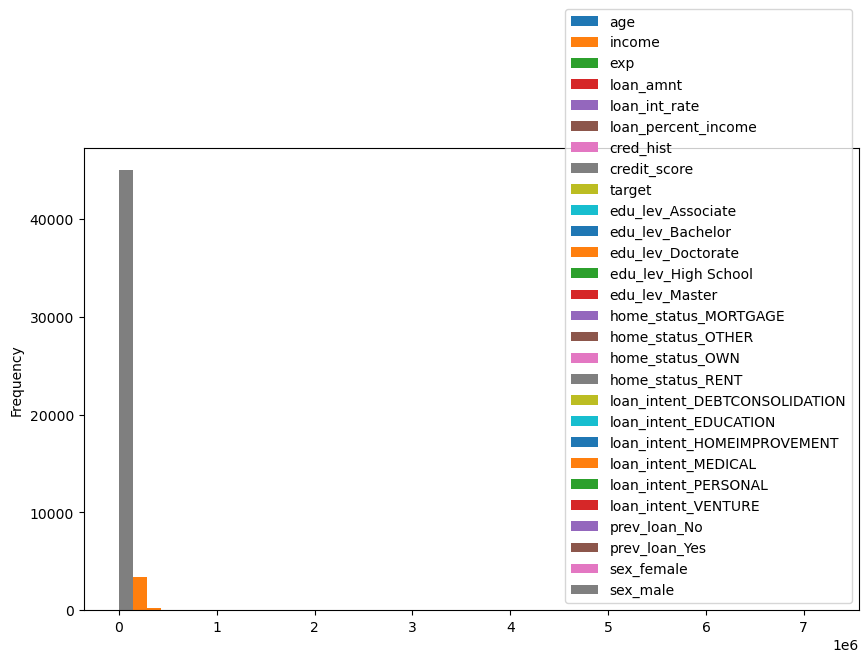

In [15]:
main_df.plot.hist(bins=50, figsize=(10, 6))
plt.show()

<Axes: ylabel='Frequency'>

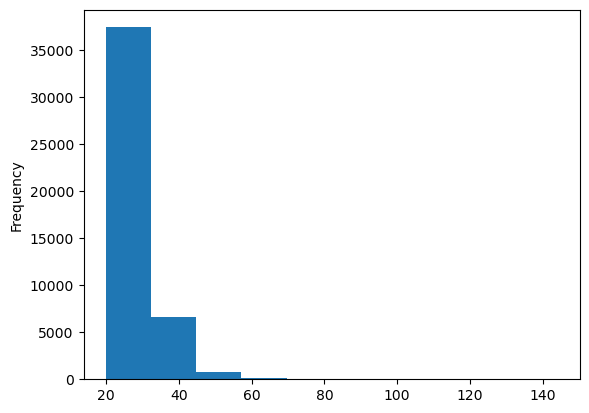

In [16]:
# Exploring and visualizing to be a subject matter of the data at hand

# Age distribution of the data to see the relation of age to laon with respect to our data
main_df.age.plot.hist()

# It can be seen that most people b/n the ages of 20-40 has the most application data in our data

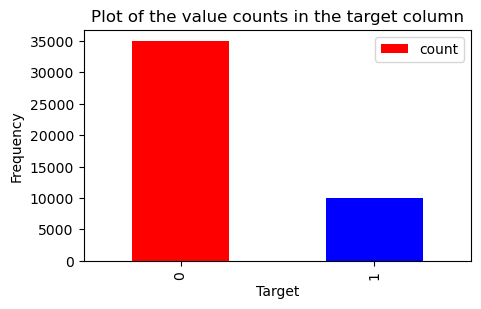

In [17]:
# Plot to check the number of people eligible to people who are not eligible for loan
plt.figure(figsize=(5, 3))
main_df["target"].value_counts().plot(kind="bar", color=["red", "blue"], legend=True)
plt.xlabel("Target")
plt.ylabel("Frequency")
plt.title("Plot of the value counts in the target column");

# It can be seen that just few people are eligible for the loan grant

In [18]:
# Finding the correlation b/n our data
to_drop = ["edu_lev_Associate","loan_intent_DEBTCONSOLIDATION","loan_intent_EDUCATION","loan_intent_HOMEIMPROVEMENT","loan_intent_MEDICAL",
                        "loan_intent_PERSONAL","loan_intent_VENTURE", "home_status_OWN", "home_status_RENT"]
corr_data = main_df.drop(to_drop, axis=1).corr()
corr_data.head()

age    income       exp  loan_amnt  loan_int_rate  \
age            1.000000  0.193698  0.954412   0.050750       0.013402   
income         0.193698  1.000000  0.185987   0.242290       0.001510   
exp            0.954412  0.185987  1.000000   0.044589       0.016631   
loan_amnt      0.050750  0.242290  0.044589   1.000000       0.146093   
loan_int_rate  0.013402  0.001510  0.016631   0.146093       1.000000   

               loan_percent_income  cred_hist  credit_score    target  \
age                      -0.043299   0.861985      0.178432 -0.021476   
income                   -0.234177   0.124316      0.035919 -0.135808   
exp                      -0.039862   0.824272      0.186196 -0.020481   
loan_amnt                 0.593011   0.042969      0.009074  0.107714   
loan_int_rate             0.125209   0.018008      0.011498  0.332005   

               edu_lev_Bachelor  edu_lev_Doctorate  edu_lev_High School  \
age                   -0.054982           0.113329             0.004769   
income                -0.004985           0.010172            -0.000707   
exp                   -0.055182           0.106693             0.008373   
loan_amnt             -0.002789           0.006515            -0.003788   
loan_int_rate          0.006201           0.002393            -0.001579   

               edu_lev_Master  home_status_MORTGAGE  home_status_OTHER  \
age                 -0.020228              0.039221          -0.007321   
income               0.000921              0.220666           0.007086   
exp                 -0.019723              0.035252          -0.004535   
loan_amnt            0.000806              0.149924           0.013738   
loan_int_rate       -0.000555             -0.125839           0.017592   

               prev_loan_No  prev_loan_Yes  sex_female  sex_male  
age                0.025917      -0.025917   -0.017528  0.017528  
income            -0.061483       0.061483   -0.010173  0.010173  
exp                0.029231      -0.029231   -0.015078  0.015078  
loan_amnt          0.059009      -0.059009   -0.010647  0.010647  
loan_int_rate      0.181800      -0.181800   -0.003662  0.003662

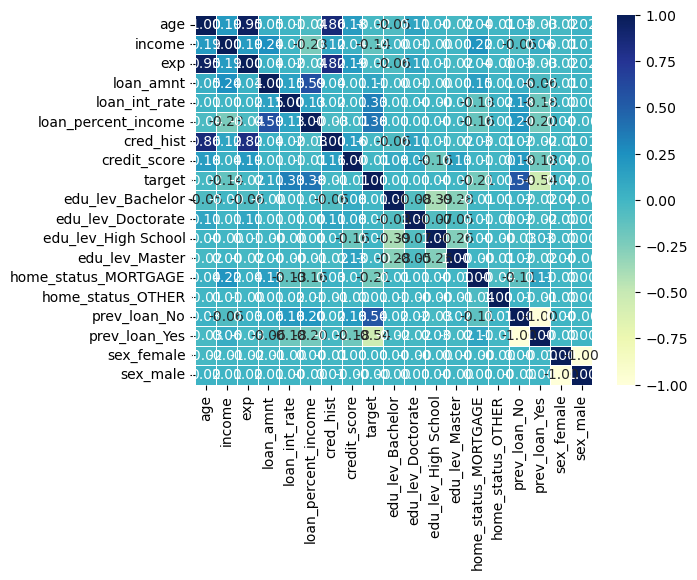

In [19]:
# Making the correlation more visual and appealing
# plt, ax = plt.subplots(figsize=(20, 15))
ax = sns.heatmap(corr_data,
                annot=True,
                lw=0.5,
                fmt=".2f",
                cmap="YlGnBu");


In [20]:
# Finding the index or parameter which consistute much more to the target value or has strong correlation
corr_data["target"].sort_values(ascending=False)

target                  1.000000
prev_loan_No            0.543096
loan_percent_income     0.384880
loan_int_rate           0.332005
loan_amnt               0.107714
home_status_OTHER       0.013645
edu_lev_Bachelor        0.004728
edu_lev_Doctorate       0.001833
edu_lev_High School     0.001277
sex_female              0.000561
sex_male               -0.000561
edu_lev_Master         -0.004741
credit_score           -0.007647
cred_hist              -0.014851
exp                    -0.020481
age                    -0.021476
income                 -0.135808
home_status_MORTGAGE   -0.213451
prev_loan_Yes          -0.543096
Name: target, dtype: float64

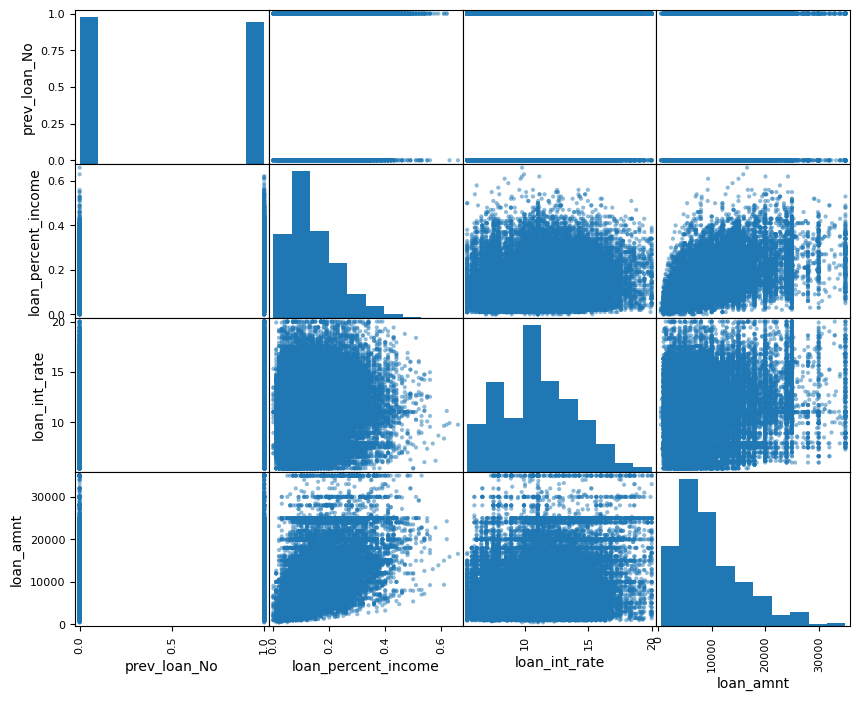

In [21]:
# Plotting a scatter graph to see the top 4 parameters with strong correlation
scatter_list = ['prev_loan_No', 'loan_percent_income', 'loan_int_rate', 'loan_amnt']
scatter_matrix(main_df[scatter_list], figsize=(10, 8))
plt.show()

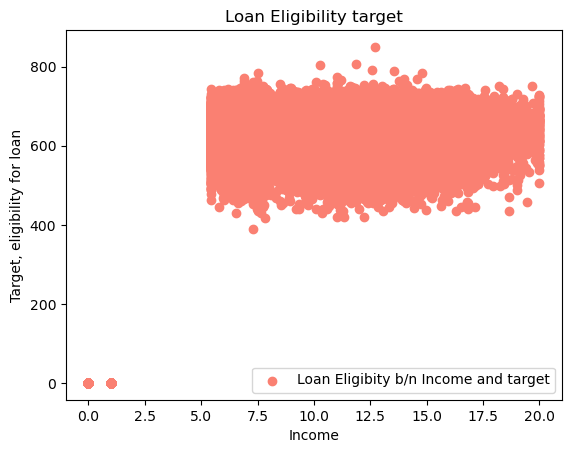

In [22]:
# plt.figure(figsize=(10, 6))
plt.scatter(main_df.prev_loan_No,
            main_df.target,
            c="salmon")

plt.scatter(main_df.loan_int_rate,
            main_df.credit_score,
            c="salmon")

plt.title("Loan Eligibility target")
plt.xlabel("Income")
plt.ylabel("Target, eligibility for loan")
plt.legend(["Loan Eligibity b/n Income and target"]);

# Model Selection

## Examining the best and suitable model algorithm

In [23]:
# First, need to split the data into X and y values
X = main_df.drop("target", axis=1)
y = main_df["target"]

# Splitting into training and testing values for fitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [24]:
# Defining our models in a dictionary for iterations
models = {"Logistic Regression": LogisticRegression(),
         "KNearestNeighbors": KNeighborsClassifier(),
         "RandomForestClassifier": RandomForestClassifier()}

# Set up a random seed
np.random.seed(42)

def fit_and_score_models(models, X_train, X_test, y_train, y_test):
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores


In [25]:
# Calling our function to check the best and performing model algorithm
model_scores = fit_and_score_models(models,X_train, X_test, y_train, y_test)
model_scores

{'Logistic Regression': 0.791,
 'KNearestNeighbors': 0.8304444444444444,
 'RandomForestClassifier': 0.9291111111111111}

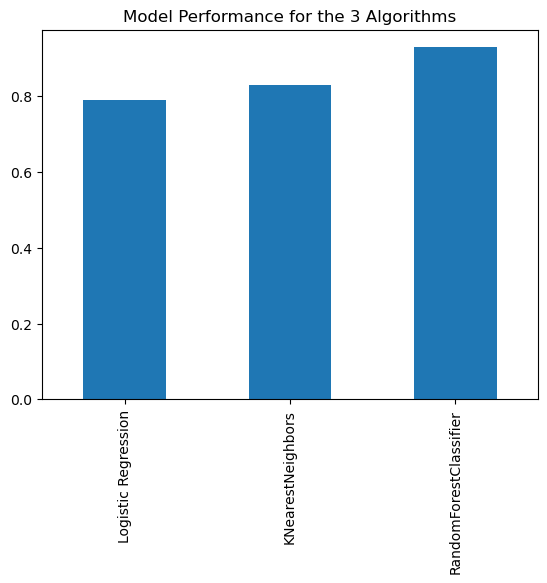

In [26]:
# Let's compare our model performance so far
model = pd.DataFrame(model_scores, index=[0])

# Let's visualize our model performance
model.T.plot.bar(title = "Model Performance for the 3 Algorithms", legend=False);

## Experimenting and Tuning the model to see any further improvements
* GridSearchCV
* RandomizedSearchCv

### Starting with our Logistic Regression with RandomizedSearchCV

In [27]:
# Calling out the algorithms and checking for possible hyperparamters tunes
logistic_model = LogisticRegression()
logistic_model.get_params()

knn_model = KNeighborsClassifier()
knn_model.get_params()

random_ft_model = RandomForestClassifier()
random_ft_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [28]:
# Setting up the hyperparameter grid for the Logistic Regression algorithm
logistic_grid = {
    "C": np.logspace(-5, 5, 30),
    "n_jobs": [10, 12],
    "verbose": [2, 4, 6],
    "solver": ["liblinear"]
}

knn_grid = {
    "algorithm": ["auto", "ball_tree", "kd_tree"],
    "n_jobs": np.arange(3, 15, 7),
    "weights": ["uniform", "distance"],
    "leaf_size": [30, 50, 60, 70]
}

random_ft_grid = {
    "n_estimators": np.arange(100, 500, 5),
    "verbose": [0, 2, 4, 6, 10],
    "min_samples_leaf": np.arange(1, 5, 3),
    "max_features": ["sqrt"]   
}

### Fitting the Logistic algorithm to its grid....RandomizedSearchCV

In [29]:
# Fitting the Grid to the Logistic Model...RandomizedSearchCV
logistic_model = RandomizedSearchCV(LogisticRegression(),
                                   param_distributions=logistic_grid,
                                   cv=5)
logistic_model.fit(X_train, y_train)

C:\Users\Michael Arthur\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 10.
  warnings.warn(


[LibLinear]

C:\Users\Michael Arthur\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 10.
  warnings.warn(


[LibLinear]

C:\Users\Michael Arthur\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 10.
  warnings.warn(


[LibLinear]

C:\Users\Michael Arthur\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 10.
  warnings.warn(


[LibLinear]

C:\Users\Michael Arthur\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 10.
  warnings.warn(


[LibLinear]

C:\Users\Michael Arthur\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 10.
  warnings.warn(


[LibLinear]

C:\Users\Michael Arthur\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 10.
  warnings.warn(


[LibLinear]

C:\Users\Michael Arthur\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 10.
  warnings.warn(


[LibLinear]

C:\Users\Michael Arthur\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 10.
  warnings.warn(


[LibLinear]

C:\Users\Michael Arthur\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 10.
  warnings.warn(


[LibLinear]

C:\Users\Michael Arthur\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 10.
  warnings.warn(


[LibLinear]

C:\Users\Michael Arthur\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 10.
  warnings.warn(


[LibLinear]

C:\Users\Michael Arthur\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 10.
  warnings.warn(


[LibLinear]

C:\Users\Michael Arthur\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 10.
  warnings.warn(


[LibLinear]

C:\Users\Michael Arthur\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 10.
  warnings.warn(


[LibLinear]

C:\Users\Michael Arthur\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 10.
  warnings.warn(


[LibLinear]

C:\Users\Michael Arthur\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 10.
  warnings.warn(


[LibLinear]

C:\Users\Michael Arthur\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 10.
  warnings.warn(


[LibLinear]

C:\Users\Michael Arthur\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 10.
  warnings.warn(


[LibLinear]

C:\Users\Michael Arthur\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 10.
  warnings.warn(


[LibLinear]

C:\Users\Michael Arthur\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 10.
  warnings.warn(


[LibLinear]

C:\Users\Michael Arthur\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 10.
  warnings.warn(


[LibLinear]

C:\Users\Michael Arthur\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 10.
  warnings.warn(


[LibLinear]

C:\Users\Michael Arthur\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 10.
  warnings.warn(


[LibLinear]

C:\Users\Michael Arthur\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 10.
  warnings.warn(


[LibLinear]

C:\Users\Michael Arthur\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(


[LibLinear]

C:\Users\Michael Arthur\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(


[LibLinear]

C:\Users\Michael Arthur\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(


[LibLinear]

C:\Users\Michael Arthur\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(


[LibLinear]

C:\Users\Michael Arthur\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(


[LibLinear]

C:\Users\Michael Arthur\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 10.
  warnings.warn(


[LibLinear]

C:\Users\Michael Arthur\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 10.
  warnings.warn(


[LibLinear]

C:\Users\Michael Arthur\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 10.
  warnings.warn(


[LibLinear]

C:\Users\Michael Arthur\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 10.
  warnings.warn(


[LibLinear]

C:\Users\Michael Arthur\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 10.
  warnings.warn(


[LibLinear]

C:\Users\Michael Arthur\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(


[LibLinear]

C:\Users\Michael Arthur\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(


[LibLinear]

C:\Users\Michael Arthur\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(


[LibLinear]

C:\Users\Michael Arthur\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(


[LibLinear]

C:\Users\Michael Arthur\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(


[LibLinear]

C:\Users\Michael Arthur\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(


[LibLinear]

C:\Users\Michael Arthur\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(


[LibLinear]

C:\Users\Michael Arthur\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(


[LibLinear]

C:\Users\Michael Arthur\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(


[LibLinear]

C:\Users\Michael Arthur\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(


[LibLinear]

C:\Users\Michael Arthur\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(


[LibLinear]

C:\Users\Michael Arthur\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(


[LibLinear]

C:\Users\Michael Arthur\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(


[LibLinear]

C:\Users\Michael Arthur\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(


[LibLinear]

C:\Users\Michael Arthur\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(


[LibLinear]

C:\Users\Michael Arthur\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(


[LibLinear]

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': array([1.00000000e-05, 2.21221629e-05, 4.89390092e-05, 1.08263673e-04,
       2.39502662e-04, 5.29831691e-04, 1.17210230e-03, 2.59294380e-03,
       5.73615251e-03, 1.26896100e-02, 2.80721620e-02, 6.21016942e-02,
       1.37382380e-01, 3.03919538e-01, 6.72335754e-01, 1.48735211e+00,
       3.29034456e+00, 7.27895384e+00, 1.61026203e+01, 3.56224789e+01,
       7.88046282e+01, 1.74332882e+02, 3.85662042e+02, 8.53167852e+02,
       1.88739182e+03, 4.17531894e+03, 9.23670857e+03, 2.04335972e+04,
       4.52035366e+04, 1.00000000e+05]),
                                        'n_jobs': [10, 12],
                                        'solver': ['liblinear'],
                                        'verbose': [2, 4, 6]})

In [30]:
print(f"The score of the logistic algorithm after tuning hyperparametr is: {logistic_model.score(X_test, y_test)*100:.2f}")
tunned_logistic_model = logistic_model.score(X_test, y_test)

The score of the logistic algorithm after tuning hyperparametr is: 83.36


### Fitting the KNeighborsClassifier to its Grid....RandomizedSearchCV

In [31]:
knn_model = RandomizedSearchCV(KNeighborsClassifier(),
                              param_distributions=knn_grid,
                               verbose=True,
                              cv=5)
knn_model.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree'],
                                        'leaf_size': [30, 50, 60, 70],
                                        'n_jobs': array([ 3, 10]),
                                        'weights': ['uniform', 'distance']},
                   verbose=True)

In [40]:
tunned_knn_score = knn_model.score(X_test, y_test)
print(f"The accuracy score of the KNN algorithm after tuning is: {tunned_knn_score}")

The accuracy score of the KNN algorithm after tuning is: 0.8304444444444444


### Fitting the RandomForestClassifier to its Grid....RandomizedSearchCV

In [41]:
random_ft_model = RandomizedSearchCV(RandomForestClassifier(),
                                    param_distributions=random_ft_grid,
                                    cv=5)
random_ft_model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 300
building tree 2 of 300
building tree 3 of 300
building tree 4 of 300
building tree 5 of 300
building tree 6 of 300
building tree 7 of 300
building tree 8 of 300
building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300
building tree 16 of 300
building tree 17 of 300
building tree 18 of 300
building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tree 35 of 300
building tree 36 of 300
building tree 37 of 300
building tree 38 of 300
building tree 39 of 300
building tree 40 of 300
building tree 41 of 300
building tree 42 of 300
b

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    9.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 300
building tree 2 of 300
building tree 3 of 300
building tree 4 of 300
building tree 5 of 300
building tree 6 of 300
building tree 7 of 300
building tree 8 of 300


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s


building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300
building tree 16 of 300
building tree 17 of 300
building tree 18 of 300
building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tree 35 of 300
building tree 36 of 300
building tree 37 of 300
building tree 38 of 300
building tree 39 of 300
building tree 40 of 300
building tree 41 of 300
building tree 42 of 300
building tree 43 of 300
building tree 44 of 300
building tree 45 of 300
building tree 46 of 300
building tree 47 of 300
building tree 48 of 300
building tree 49 of 300
building tree 50 

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    9.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 300
building tree 2 of 300
building tree 3 of 300
building tree 4 of 300
building tree 5 of 300
building tree 6 of 300


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s


building tree 7 of 300
building tree 8 of 300
building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300
building tree 16 of 300
building tree 17 of 300
building tree 18 of 300
building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tree 35 of 300
building tree 36 of 300
building tree 37 of 300
building tree 38 of 300
building tree 39 of 300
building tree 40 of 300
building tree 41 of 300
building tree 42 of 300
building tree 43 of 300
building tree 44 of 300
building tree 45 of 300
building tree 46 of 300
building tree 47 of 300
building tree 48 of

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    9.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 300
building tree 2 of 300
building tree 3 of 300
building tree 4 of 300
building tree 5 of 300
building tree 6 of 300
building tree 7 of 300


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 300
building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300
building tree 16 of 300
building tree 17 of 300
building tree 18 of 300
building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tree 35 of 300
building tree 36 of 300
building tree 37 of 300
building tree 38 of 300
building tree 39 of 300
building tree 40 of 300
building tree 41 of 300
building tree 42 of 300
building tree 43 of 300
building tree 44 of 300
building tree 45 of 300
building tree 46 of 300
building tree 47 of 300
building tree 48 of 300
building tree 49 o

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    9.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 300
building tree 2 of 300
building tree 3 of 300
building tree 4 of 300
building tree 5 of 300
building tree 6 of 300
building tree 7 of 300
building tree 8 of 300


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s


building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300
building tree 16 of 300
building tree 17 of 300
building tree 18 of 300
building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tree 35 of 300
building tree 36 of 300
building tree 37 of 300
building tree 38 of 300
building tree 39 of 300
building tree 40 of 300
building tree 41 of 300
building tree 42 of 300
building tree 43 of 300
building tree 44 of 300
building tree 45 of 300
building tree 46 of 300
building tree 47 of 300
building tree 48 of 300
building tree 49 of 300
building tree 50 

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   14.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 305
building tree 2 of 305
building tree 3 of 305
building tree 4 of 305
building tree 5 of 305
building tree 6 of 305
building tree 7 of 305
building tree 8 of 305
building tree 9 of 305
building tree 10 of 305
building tree 11 of 305
building tree 12 of 305
building tree 13 of 305
building tree 14 of 305
building tree 15 of 305
building tree 16 of 305
building tree 17 of 305
building tree 18 of 305
building tree 19 of 305
building tree 20 of 305
building tree 21 of 305
building tree 22 of 305
building tree 23 of 305
building tree 24 of 305
building tree 25 of 305
building tree 26 of 305
building tree 27 of 305
building tree 28 of 305
building tree 29 of 305
building tree 30 of 305
building tree 31 of 305
building tree 32 of 305
building tree 33 of 305
building tree 34 of 305
building tree 35 of 305
building tree 36 of 305
building tree 37 of 305
building tree 38 of 305
building tree 39 of 305
building tree 40 of 305
building tree 41 of 305
building tree 42 of 305
b

[Parallel(n_jobs=1)]: Done 305 out of 305 | elapsed:   13.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 305 out of 305 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 305
building tree 2 of 305
building tree 3 of 305
building tree 4 of 305
building tree 5 of 305
building tree 6 of 305


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 305
building tree 8 of 305
building tree 9 of 305
building tree 10 of 305
building tree 11 of 305
building tree 12 of 305
building tree 13 of 305
building tree 14 of 305
building tree 15 of 305
building tree 16 of 305
building tree 17 of 305
building tree 18 of 305
building tree 19 of 305
building tree 20 of 305
building tree 21 of 305
building tree 22 of 305
building tree 23 of 305
building tree 24 of 305
building tree 25 of 305
building tree 26 of 305
building tree 27 of 305
building tree 28 of 305
building tree 29 of 305
building tree 30 of 305
building tree 31 of 305
building tree 32 of 305
building tree 33 of 305
building tree 34 of 305
building tree 35 of 305
building tree 36 of 305
building tree 37 of 305
building tree 38 of 305
building tree 39 of 305
building tree 40 of 305
building tree 41 of 305
building tree 42 of 305
building tree 43 of 305
building tree 44 of 305
building tree 45 of 305
building tree 46 of 305
building tree 47 of 305
building tree 48 of

[Parallel(n_jobs=1)]: Done 305 out of 305 | elapsed:   11.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 305 out of 305 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 305
building tree 2 of 305
building tree 3 of 305
building tree 4 of 305
building tree 5 of 305
building tree 6 of 305


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 305
building tree 8 of 305
building tree 9 of 305
building tree 10 of 305
building tree 11 of 305
building tree 12 of 305
building tree 13 of 305
building tree 14 of 305
building tree 15 of 305
building tree 16 of 305
building tree 17 of 305
building tree 18 of 305
building tree 19 of 305
building tree 20 of 305
building tree 21 of 305
building tree 22 of 305
building tree 23 of 305
building tree 24 of 305
building tree 25 of 305
building tree 26 of 305
building tree 27 of 305
building tree 28 of 305
building tree 29 of 305
building tree 30 of 305
building tree 31 of 305
building tree 32 of 305
building tree 33 of 305
building tree 34 of 305
building tree 35 of 305
building tree 36 of 305
building tree 37 of 305
building tree 38 of 305
building tree 39 of 305
building tree 40 of 305
building tree 41 of 305
building tree 42 of 305
building tree 43 of 305
building tree 44 of 305
building tree 45 of 305
building tree 46 of 305
building tree 47 of 305
building tree 48 of

[Parallel(n_jobs=1)]: Done 305 out of 305 | elapsed:   11.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 305 out of 305 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 305
building tree 2 of 305
building tree 3 of 305
building tree 4 of 305
building tree 5 of 305
building tree 6 of 305
building tree 7 of 305
building tree 8 of 305
building tree 9 of 305
building tree 10 of 305
building tree 11 of 305
building tree 12 of 305
building tree 13 of 305
building tree 14 of 305
building tree 15 of 305
building tree 16 of 305
building tree 17 of 305
building tree 18 of 305
building tree 19 of 305
building tree 20 of 305
building tree 21 of 305
building tree 22 of 305
building tree 23 of 305
building tree 24 of 305
building tree 25 of 305
building tree 26 of 305
building tree 27 of 305
building tree 28 of 305
building tree 29 of 305
building tree 30 of 305
building tree 31 of 305
building tree 32 of 305
building tree 33 of 305
building tree 34 of 305
building tree 35 of 305
building tree 36 of 305
building tree 37 of 305
building tree 38 of 305
building tree 39 of 305
building tree 40 of 305
building tree 41 of 305
building tree 42 of 305
b

[Parallel(n_jobs=1)]: Done 305 out of 305 | elapsed:   11.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 305 out of 305 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 305
building tree 2 of 305
building tree 3 of 305
building tree 4 of 305
building tree 5 of 305
building tree 6 of 305
building tree 7 of 305
building tree 8 of 305
building tree 9 of 305
building tree 10 of 305
building tree 11 of 305
building tree 12 of 305
building tree 13 of 305
building tree 14 of 305
building tree 15 of 305
building tree 16 of 305
building tree 17 of 305
building tree 18 of 305
building tree 19 of 305
building tree 20 of 305
building tree 21 of 305
building tree 22 of 305
building tree 23 of 305
building tree 24 of 305
building tree 25 of 305
building tree 26 of 305
building tree 27 of 305
building tree 28 of 305
building tree 29 of 305
building tree 30 of 305
building tree 31 of 305
building tree 32 of 305
building tree 33 of 305
building tree 34 of 305
building tree 35 of 305
building tree 36 of 305
building tree 37 of 305
building tree 38 of 305
building tree 39 of 305
building tree 40 of 305
building tree 41 of 305
building tree 42 of 305
b

[Parallel(n_jobs=1)]: Done 305 out of 305 | elapsed:   11.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 305 out of 305 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 260
building tree 2 of 260
building tree 3 of 260
building tree 4 of 260
building tree 5 of 260
building tree 6 of 260
building tree 7 of 260


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 260
building tree 9 of 260
building tree 10 of 260
building tree 11 of 260
building tree 12 of 260
building tree 13 of 260
building tree 14 of 260
building tree 15 of 260
building tree 16 of 260
building tree 17 of 260
building tree 18 of 260
building tree 19 of 260
building tree 20 of 260
building tree 21 of 260
building tree 22 of 260
building tree 23 of 260
building tree 24 of 260
building tree 25 of 260
building tree 26 of 260
building tree 27 of 260
building tree 28 of 260
building tree 29 of 260
building tree 30 of 260
building tree 31 of 260
building tree 32 of 260
building tree 33 of 260
building tree 34 of 260
building tree 35 of 260
building tree 36 of 260
building tree 37 of 260
building tree 38 of 260
building tree 39 of 260
building tree 40 of 260
building tree 41 of 260
building tree 42 of 260
building tree 43 of 260
building tree 44 of 260
building tree 45 of 260
building tree 46 of 260
building tree 47 of 260
building tree 48 of 260
building tree 49 o

[Parallel(n_jobs=1)]: Done 260 out of 260 | elapsed:    8.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 260 out of 260 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 260
building tree 2 of 260
building tree 3 of 260
building tree 4 of 260
building tree 5 of 260
building tree 6 of 260
building tree 7 of 260
building tree 8 of 260


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s


building tree 9 of 260
building tree 10 of 260
building tree 11 of 260
building tree 12 of 260
building tree 13 of 260
building tree 14 of 260
building tree 15 of 260
building tree 16 of 260
building tree 17 of 260
building tree 18 of 260
building tree 19 of 260
building tree 20 of 260
building tree 21 of 260
building tree 22 of 260
building tree 23 of 260
building tree 24 of 260
building tree 25 of 260
building tree 26 of 260
building tree 27 of 260
building tree 28 of 260
building tree 29 of 260
building tree 30 of 260
building tree 31 of 260
building tree 32 of 260
building tree 33 of 260
building tree 34 of 260
building tree 35 of 260
building tree 36 of 260
building tree 37 of 260
building tree 38 of 260
building tree 39 of 260
building tree 40 of 260
building tree 41 of 260
building tree 42 of 260
building tree 43 of 260
building tree 44 of 260
building tree 45 of 260
building tree 46 of 260
building tree 47 of 260
building tree 48 of 260
building tree 49 of 260
building tree 50 

[Parallel(n_jobs=1)]: Done 260 out of 260 | elapsed:    8.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 260 out of 260 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 260
building tree 2 of 260
building tree 3 of 260
building tree 4 of 260
building tree 5 of 260
building tree 6 of 260
building tree 7 of 260


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 260
building tree 9 of 260
building tree 10 of 260
building tree 11 of 260
building tree 12 of 260
building tree 13 of 260
building tree 14 of 260
building tree 15 of 260
building tree 16 of 260
building tree 17 of 260
building tree 18 of 260
building tree 19 of 260
building tree 20 of 260
building tree 21 of 260
building tree 22 of 260
building tree 23 of 260
building tree 24 of 260
building tree 25 of 260
building tree 26 of 260
building tree 27 of 260
building tree 28 of 260
building tree 29 of 260
building tree 30 of 260
building tree 31 of 260
building tree 32 of 260
building tree 33 of 260
building tree 34 of 260
building tree 35 of 260
building tree 36 of 260
building tree 37 of 260
building tree 38 of 260
building tree 39 of 260
building tree 40 of 260
building tree 41 of 260
building tree 42 of 260
building tree 43 of 260
building tree 44 of 260
building tree 45 of 260
building tree 46 of 260
building tree 47 of 260
building tree 48 of 260
building tree 49 o

[Parallel(n_jobs=1)]: Done 260 out of 260 | elapsed:    8.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 260 out of 260 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 260
building tree 2 of 260
building tree 3 of 260
building tree 4 of 260
building tree 5 of 260
building tree 6 of 260
building tree 7 of 260


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 260
building tree 9 of 260
building tree 10 of 260
building tree 11 of 260
building tree 12 of 260
building tree 13 of 260
building tree 14 of 260
building tree 15 of 260
building tree 16 of 260
building tree 17 of 260
building tree 18 of 260
building tree 19 of 260
building tree 20 of 260
building tree 21 of 260
building tree 22 of 260
building tree 23 of 260
building tree 24 of 260
building tree 25 of 260
building tree 26 of 260
building tree 27 of 260
building tree 28 of 260
building tree 29 of 260
building tree 30 of 260
building tree 31 of 260
building tree 32 of 260
building tree 33 of 260
building tree 34 of 260
building tree 35 of 260
building tree 36 of 260
building tree 37 of 260
building tree 38 of 260
building tree 39 of 260
building tree 40 of 260
building tree 41 of 260
building tree 42 of 260
building tree 43 of 260
building tree 44 of 260
building tree 45 of 260
building tree 46 of 260
building tree 47 of 260
building tree 48 of 260
building tree 49 o

[Parallel(n_jobs=1)]: Done 260 out of 260 | elapsed:    8.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 260 out of 260 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 260
building tree 2 of 260
building tree 3 of 260
building tree 4 of 260
building tree 5 of 260
building tree 6 of 260
building tree 7 of 260


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 260
building tree 9 of 260
building tree 10 of 260
building tree 11 of 260
building tree 12 of 260
building tree 13 of 260
building tree 14 of 260
building tree 15 of 260
building tree 16 of 260
building tree 17 of 260
building tree 18 of 260
building tree 19 of 260
building tree 20 of 260
building tree 21 of 260
building tree 22 of 260
building tree 23 of 260
building tree 24 of 260
building tree 25 of 260
building tree 26 of 260
building tree 27 of 260
building tree 28 of 260
building tree 29 of 260
building tree 30 of 260
building tree 31 of 260
building tree 32 of 260
building tree 33 of 260
building tree 34 of 260
building tree 35 of 260
building tree 36 of 260
building tree 37 of 260
building tree 38 of 260
building tree 39 of 260
building tree 40 of 260
building tree 41 of 260
building tree 42 of 260
building tree 43 of 260
building tree 44 of 260
building tree 45 of 260
building tree 46 of 260
building tree 47 of 260
building tree 48 of 260
building tree 49 o

[Parallel(n_jobs=1)]: Done 260 out of 260 | elapsed:    8.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 260 out of 260 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 235
building tree 2 of 235
building tree 3 of 235
building tree 4 of 235
building tree 5 of 235
building tree 6 of 235


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.2s remaining:    0.0s


building tree 7 of 235
building tree 8 of 235
building tree 9 of 235
building tree 10 of 235
building tree 11 of 235
building tree 12 of 235


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.3s remaining:    0.0s


building tree 13 of 235
building tree 14 of 235
building tree 15 of 235
building tree 16 of 235
building tree 17 of 235
building tree 18 of 235
building tree 19 of 235
building tree 20 of 235
building tree 21 of 235
building tree 22 of 235
building tree 23 of 235
building tree 24 of 235
building tree 25 of 235
building tree 26 of 235
building tree 27 of 235
building tree 28 of 235
building tree 29 of 235
building tree 30 of 235
building tree 31 of 235
building tree 32 of 235
building tree 33 of 235
building tree 34 of 235
building tree 35 of 235
building tree 36 of 235
building tree 37 of 235
building tree 38 of 235
building tree 39 of 235
building tree 40 of 235
building tree 41 of 235
building tree 42 of 235
building tree 43 of 235
building tree 44 of 235
building tree 45 of 235
building tree 46 of 235
building tree 47 of 235
building tree 48 of 235
building tree 49 of 235
building tree 50 of 235
building tree 51 of 235
building tree 52 of 235
building tree 53 of 235
building tree 54

[Parallel(n_jobs=1)]: Done 235 out of 235 | elapsed:    8.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 235 out of 235 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 

building tree 1 of 235
building tree 2 of 235
building tree 3 of 235
building tree 4 of 235
building tree 5 of 235
building tree 6 of 235


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.2s remaining:    0.0s


building tree 7 of 235
building tree 8 of 235
building tree 9 of 235
building tree 10 of 235
building tree 11 of 235
building tree 12 of 235


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.2s remaining:    0.0s


building tree 13 of 235
building tree 14 of 235
building tree 15 of 235
building tree 16 of 235
building tree 17 of 235
building tree 18 of 235
building tree 19 of 235
building tree 20 of 235
building tree 21 of 235
building tree 22 of 235
building tree 23 of 235
building tree 24 of 235
building tree 25 of 235
building tree 26 of 235
building tree 27 of 235
building tree 28 of 235
building tree 29 of 235
building tree 30 of 235
building tree 31 of 235
building tree 32 of 235
building tree 33 of 235
building tree 34 of 235
building tree 35 of 235
building tree 36 of 235
building tree 37 of 235
building tree 38 of 235
building tree 39 of 235
building tree 40 of 235
building tree 41 of 235
building tree 42 of 235
building tree 43 of 235
building tree 44 of 235
building tree 45 of 235
building tree 46 of 235
building tree 47 of 235
building tree 48 of 235
building tree 49 of 235
building tree 50 of 235
building tree 51 of 235
building tree 52 of 235
building tree 53 of 235
building tree 54

[Parallel(n_jobs=1)]: Done 235 out of 235 | elapsed:    8.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 235 out of 235 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 

building tree 1 of 235
building tree 2 of 235
building tree 3 of 235
building tree 4 of 235
building tree 5 of 235
building tree 6 of 235


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.2s remaining:    0.0s


building tree 7 of 235
building tree 8 of 235
building tree 9 of 235
building tree 10 of 235
building tree 11 of 235
building tree 12 of 235
building tree 13 of 235


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.2s remaining:    0.0s


building tree 14 of 235
building tree 15 of 235
building tree 16 of 235
building tree 17 of 235
building tree 18 of 235
building tree 19 of 235
building tree 20 of 235
building tree 21 of 235
building tree 22 of 235
building tree 23 of 235
building tree 24 of 235
building tree 25 of 235
building tree 26 of 235
building tree 27 of 235
building tree 28 of 235
building tree 29 of 235
building tree 30 of 235
building tree 31 of 235
building tree 32 of 235
building tree 33 of 235
building tree 34 of 235
building tree 35 of 235
building tree 36 of 235
building tree 37 of 235
building tree 38 of 235
building tree 39 of 235
building tree 40 of 235
building tree 41 of 235
building tree 42 of 235
building tree 43 of 235
building tree 44 of 235
building tree 45 of 235
building tree 46 of 235
building tree 47 of 235
building tree 48 of 235
building tree 49 of 235
building tree 50 of 235
building tree 51 of 235
building tree 52 of 235
building tree 53 of 235
building tree 54 of 235
building tree 55

[Parallel(n_jobs=1)]: Done 235 out of 235 | elapsed:    8.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 235 out of 235 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 

building tree 1 of 235
building tree 2 of 235
building tree 3 of 235
building tree 4 of 235
building tree 5 of 235
building tree 6 of 235
building tree 7 of 235


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.2s remaining:    0.0s


building tree 8 of 235
building tree 9 of 235
building tree 10 of 235
building tree 11 of 235
building tree 12 of 235
building tree 13 of 235


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.2s remaining:    0.0s


building tree 14 of 235
building tree 15 of 235
building tree 16 of 235
building tree 17 of 235
building tree 18 of 235
building tree 19 of 235
building tree 20 of 235
building tree 21 of 235
building tree 22 of 235
building tree 23 of 235
building tree 24 of 235
building tree 25 of 235
building tree 26 of 235
building tree 27 of 235
building tree 28 of 235
building tree 29 of 235
building tree 30 of 235
building tree 31 of 235
building tree 32 of 235
building tree 33 of 235
building tree 34 of 235
building tree 35 of 235
building tree 36 of 235
building tree 37 of 235
building tree 38 of 235
building tree 39 of 235
building tree 40 of 235
building tree 41 of 235
building tree 42 of 235
building tree 43 of 235
building tree 44 of 235
building tree 45 of 235
building tree 46 of 235
building tree 47 of 235
building tree 48 of 235
building tree 49 of 235
building tree 50 of 235
building tree 51 of 235
building tree 52 of 235
building tree 53 of 235
building tree 54 of 235
building tree 55

[Parallel(n_jobs=1)]: Done 235 out of 235 | elapsed:    8.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 235 out of 235 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 

building tree 1 of 235
building tree 2 of 235
building tree 3 of 235
building tree 4 of 235
building tree 5 of 235
building tree 6 of 235


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.2s remaining:    0.0s


building tree 7 of 235
building tree 8 of 235
building tree 9 of 235
building tree 10 of 235
building tree 11 of 235
building tree 12 of 235
building tree 13 of 235


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.2s remaining:    0.0s


building tree 14 of 235
building tree 15 of 235
building tree 16 of 235
building tree 17 of 235
building tree 18 of 235
building tree 19 of 235
building tree 20 of 235
building tree 21 of 235
building tree 22 of 235
building tree 23 of 235
building tree 24 of 235
building tree 25 of 235
building tree 26 of 235
building tree 27 of 235
building tree 28 of 235
building tree 29 of 235
building tree 30 of 235
building tree 31 of 235
building tree 32 of 235
building tree 33 of 235
building tree 34 of 235
building tree 35 of 235
building tree 36 of 235
building tree 37 of 235
building tree 38 of 235
building tree 39 of 235
building tree 40 of 235
building tree 41 of 235
building tree 42 of 235
building tree 43 of 235
building tree 44 of 235
building tree 45 of 235
building tree 46 of 235
building tree 47 of 235
building tree 48 of 235
building tree 49 of 235
building tree 50 of 235
building tree 51 of 235
building tree 52 of 235
building tree 53 of 235
building tree 54 of 235
building tree 55

[Parallel(n_jobs=1)]: Done 235 out of 235 | elapsed:    8.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.


[Parallel(n_jobs=1)]: Done 235 out of 235 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 245
building tree 2 of 245
building tree 3 of 245
building tree 4 of 245
building tree 5 of 245
building tree 6 of 245
building tree 7 of 245
building tree 8 of 245
building tree 9 of 245
building tree 10 of 245
building tree 11 of 245
building tree 12 of 245
building tree 13 of 245
building tree 14 of 245
building tree 15 of 245
building tree 16 of 245
building tree 17 of 245
building tree 18 of 245
building tree 19 of 245
building tree 20 of 245
building tree 21 of 245
building tree 22 of 245
building tree 23 of 245
building tree 24 of 245
building tree 25 of 245
building tree 26 of 245
building tree 27 of 245
building tree 28 of 245
building tree 29 of 245
building tree 30 of 245
building tree 31 of 245
building tree 32 of 245
building tree 33 of 245
building tree 34 of 245
building tree 35 of 245
building tree 36 of 245
building tree 37 of 245
building tree 38 of 245
building tree 39 of 245
building tree 40 of 245
building tree 41 of 245
building tree 42 of 245
b

[Parallel(n_jobs=1)]: Done 245 out of 245 | elapsed:    7.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 245 out of 245 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 245
building tree 2 of 245
building tree 3 of 245
building tree 4 of 245
building tree 5 of 245
building tree 6 of 245
building tree 7 of 245
building tree 8 of 245
building tree 9 of 245
building tree 10 of 245
building tree 11 of 245
building tree 12 of 245
building tree 13 of 245
building tree 14 of 245
building tree 15 of 245
building tree 16 of 245
building tree 17 of 245
building tree 18 of 245
building tree 19 of 245
building tree 20 of 245
building tree 21 of 245
building tree 22 of 245
building tree 23 of 245
building tree 24 of 245
building tree 25 of 245
building tree 26 of 245
building tree 27 of 245
building tree 28 of 245
building tree 29 of 245
building tree 30 of 245
building tree 31 of 245
building tree 32 of 245
building tree 33 of 245
building tree 34 of 245
building tree 35 of 245
building tree 36 of 245
building tree 37 of 245
building tree 38 of 245
building tree 39 of 245
building tree 40 of 245
building tree 41 of 245
building tree 42 of 245
b

[Parallel(n_jobs=1)]: Done 245 out of 245 | elapsed:    7.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 245 out of 245 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 245
building tree 2 of 245
building tree 3 of 245
building tree 4 of 245
building tree 5 of 245
building tree 6 of 245
building tree 7 of 245
building tree 8 of 245
building tree 9 of 245
building tree 10 of 245
building tree 11 of 245
building tree 12 of 245
building tree 13 of 245
building tree 14 of 245
building tree 15 of 245
building tree 16 of 245
building tree 17 of 245
building tree 18 of 245
building tree 19 of 245
building tree 20 of 245
building tree 21 of 245
building tree 22 of 245
building tree 23 of 245
building tree 24 of 245
building tree 25 of 245
building tree 26 of 245
building tree 27 of 245
building tree 28 of 245
building tree 29 of 245
building tree 30 of 245
building tree 31 of 245
building tree 32 of 245
building tree 33 of 245
building tree 34 of 245
building tree 35 of 245
building tree 36 of 245
building tree 37 of 245
building tree 38 of 245
building tree 39 of 245
building tree 40 of 245
building tree 41 of 245
building tree 42 of 245
b

[Parallel(n_jobs=1)]: Done 245 out of 245 | elapsed:    7.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 245 out of 245 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 245
building tree 2 of 245
building tree 3 of 245
building tree 4 of 245
building tree 5 of 245
building tree 6 of 245
building tree 7 of 245
building tree 8 of 245
building tree 9 of 245
building tree 10 of 245
building tree 11 of 245
building tree 12 of 245
building tree 13 of 245
building tree 14 of 245
building tree 15 of 245
building tree 16 of 245
building tree 17 of 245
building tree 18 of 245
building tree 19 of 245
building tree 20 of 245
building tree 21 of 245
building tree 22 of 245
building tree 23 of 245
building tree 24 of 245
building tree 25 of 245
building tree 26 of 245
building tree 27 of 245
building tree 28 of 245
building tree 29 of 245
building tree 30 of 245
building tree 31 of 245
building tree 32 of 245
building tree 33 of 245
building tree 34 of 245
building tree 35 of 245
building tree 36 of 245
building tree 37 of 245
building tree 38 of 245
building tree 39 of 245
building tree 40 of 245
building tree 41 of 245
building tree 42 of 245
b

[Parallel(n_jobs=1)]: Done 245 out of 245 | elapsed:    7.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 245 out of 245 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 245
building tree 2 of 245
building tree 3 of 245
building tree 4 of 245
building tree 5 of 245
building tree 6 of 245
building tree 7 of 245
building tree 8 of 245
building tree 9 of 245
building tree 10 of 245
building tree 11 of 245
building tree 12 of 245
building tree 13 of 245
building tree 14 of 245
building tree 15 of 245
building tree 16 of 245
building tree 17 of 245
building tree 18 of 245
building tree 19 of 245
building tree 20 of 245
building tree 21 of 245
building tree 22 of 245
building tree 23 of 245
building tree 24 of 245
building tree 25 of 245
building tree 26 of 245
building tree 27 of 245
building tree 28 of 245
building tree 29 of 245
building tree 30 of 245
building tree 31 of 245
building tree 32 of 245
building tree 33 of 245
building tree 34 of 245
building tree 35 of 245
building tree 36 of 245
building tree 37 of 245
building tree 38 of 245
building tree 39 of 245
building tree 40 of 245
building tree 41 of 245
building tree 42 of 245
b

[Parallel(n_jobs=1)]: Done 245 out of 245 | elapsed:    7.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 245 out of 245 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s


building tree 1 of 405
building tree 2 of 405
building tree 3 of 405
building tree 4 of 405
building tree 5 of 405
building tree 6 of 405
building tree 7 of 405
building tree 8 of 405
building tree 9 of 405
building tree 10 of 405
building tree 11 of 405
building tree 12 of 405
building tree 13 of 405
building tree 14 of 405
building tree 15 of 405
building tree 16 of 405
building tree 17 of 405
building tree 18 of 405
building tree 19 of 405
building tree 20 of 405
building tree 21 of 405
building tree 22 of 405
building tree 23 of 405
building tree 24 of 405
building tree 25 of 405
building tree 26 of 405
building tree 27 of 405
building tree 28 of 405
building tree 29 of 405
building tree 30 of 405
building tree 31 of 405
building tree 32 of 405
building tree 33 of 405
building tree 34 of 405
building tree 35 of 405
building tree 36 of 405
building tree 37 of 405
building tree 38 of 405
building tree 39 of 405
building tree 40 of 405
building tree 41 of 405
building tree 42 of 405
b

[Parallel(n_jobs=1)]: Done 405 out of 405 | elapsed:   15.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 405 out of 405 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.

building tree 1 of 405
building tree 2 of 405
building tree 3 of 405
building tree 4 of 405
building tree 5 of 405
building tree 6 of 405
building tree 7 of 405
building tree 8 of 405
building tree 9 of 405
building tree 10 of 405
building tree 11 of 405
building tree 12 of 405
building tree 13 of 405
building tree 14 of 405
building tree 15 of 405
building tree 16 of 405
building tree 17 of 405
building tree 18 of 405
building tree 19 of 405
building tree 20 of 405
building tree 21 of 405
building tree 22 of 405
building tree 23 of 405
building tree 24 of 405
building tree 25 of 405
building tree 26 of 405
building tree 27 of 405
building tree 28 of 405
building tree 29 of 405
building tree 30 of 405
building tree 31 of 405
building tree 32 of 405
building tree 33 of 405
building tree 34 of 405
building tree 35 of 405
building tree 36 of 405
building tree 37 of 405
building tree 38 of 405
building tree 39 of 405
building tree 40 of 405
building tree 41 of 405
building tree 42 of 405
b

[Parallel(n_jobs=1)]: Done 405 out of 405 | elapsed:   15.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 405 out of 405 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.

building tree 1 of 405
building tree 2 of 405
building tree 3 of 405
building tree 4 of 405
building tree 5 of 405
building tree 6 of 405
building tree 7 of 405
building tree 8 of 405
building tree 9 of 405
building tree 10 of 405
building tree 11 of 405
building tree 12 of 405
building tree 13 of 405
building tree 14 of 405
building tree 15 of 405
building tree 16 of 405
building tree 17 of 405
building tree 18 of 405
building tree 19 of 405
building tree 20 of 405
building tree 21 of 405
building tree 22 of 405
building tree 23 of 405
building tree 24 of 405
building tree 25 of 405
building tree 26 of 405
building tree 27 of 405
building tree 28 of 405
building tree 29 of 405
building tree 30 of 405
building tree 31 of 405
building tree 32 of 405
building tree 33 of 405
building tree 34 of 405
building tree 35 of 405
building tree 36 of 405
building tree 37 of 405
building tree 38 of 405
building tree 39 of 405
building tree 40 of 405
building tree 41 of 405
building tree 42 of 405
b

[Parallel(n_jobs=1)]: Done 405 out of 405 | elapsed:   14.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 405 out of 405 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.

building tree 1 of 405
building tree 2 of 405
building tree 3 of 405
building tree 4 of 405
building tree 5 of 405
building tree 6 of 405
building tree 7 of 405
building tree 8 of 405
building tree 9 of 405
building tree 10 of 405
building tree 11 of 405
building tree 12 of 405
building tree 13 of 405
building tree 14 of 405
building tree 15 of 405
building tree 16 of 405
building tree 17 of 405
building tree 18 of 405
building tree 19 of 405
building tree 20 of 405
building tree 21 of 405
building tree 22 of 405
building tree 23 of 405
building tree 24 of 405
building tree 25 of 405
building tree 26 of 405
building tree 27 of 405
building tree 28 of 405
building tree 29 of 405
building tree 30 of 405
building tree 31 of 405
building tree 32 of 405
building tree 33 of 405
building tree 34 of 405
building tree 35 of 405
building tree 36 of 405
building tree 37 of 405
building tree 38 of 405
building tree 39 of 405
building tree 40 of 405
building tree 41 of 405
building tree 42 of 405
b

[Parallel(n_jobs=1)]: Done 405 out of 405 | elapsed:   15.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 405 out of 405 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 405
building tree 2 of 405
building tree 3 of 405
building tree 4 of 405
building tree 5 of 405
building tree 6 of 405


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s


building tree 7 of 405
building tree 8 of 405
building tree 9 of 405
building tree 10 of 405
building tree 11 of 405
building tree 12 of 405
building tree 13 of 405
building tree 14 of 405
building tree 15 of 405
building tree 16 of 405
building tree 17 of 405
building tree 18 of 405
building tree 19 of 405
building tree 20 of 405
building tree 21 of 405
building tree 22 of 405
building tree 23 of 405
building tree 24 of 405
building tree 25 of 405
building tree 26 of 405
building tree 27 of 405
building tree 28 of 405
building tree 29 of 405
building tree 30 of 405
building tree 31 of 405
building tree 32 of 405
building tree 33 of 405
building tree 34 of 405
building tree 35 of 405
building tree 36 of 405
building tree 37 of 405
building tree 38 of 405
building tree 39 of 405
building tree 40 of 405
building tree 41 of 405
building tree 42 of 405
building tree 43 of 405
building tree 44 of 405
building tree 45 of 405
building tree 46 of 405
building tree 47 of 405
building tree 48 of

[Parallel(n_jobs=1)]: Done 405 out of 405 | elapsed:   15.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 405 out of 405 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 405
building tree 2 of 405
building tree 3 of 405
building tree 4 of 405


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s remaining:    0.0s


building tree 5 of 405
building tree 6 of 405
building tree 7 of 405
building tree 8 of 405
building tree 9 of 405
building tree 10 of 405
building tree 11 of 405
building tree 12 of 405
building tree 13 of 405
building tree 14 of 405
building tree 15 of 405
building tree 16 of 405
building tree 17 of 405
building tree 18 of 405
building tree 19 of 405
building tree 20 of 405
building tree 21 of 405
building tree 22 of 405
building tree 23 of 405
building tree 24 of 405
building tree 25 of 405
building tree 26 of 405
building tree 27 of 405
building tree 28 of 405
building tree 29 of 405
building tree 30 of 405
building tree 31 of 405
building tree 32 of 405
building tree 33 of 405
building tree 34 of 405
building tree 35 of 405
building tree 36 of 405
building tree 37 of 405
building tree 38 of 405
building tree 39 of 405
building tree 40 of 405
building tree 41 of 405
building tree 42 of 405
building tree 43 of 405
building tree 44 of 405
building tree 45 of 405
building tree 46 of 4

[Parallel(n_jobs=1)]: Done 405 out of 405 | elapsed:   19.2s finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_features': ['sqrt'],
                                        'min_samples_leaf': array([1, 4]),
                                        'n_estimators': array([100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160,
       165, 170, 175, 180, 185, 190, 195, 200, 205, 210, 215, 220, 225,
       230, 235, 240, 245, 250, 255, 260, 265, 270, 275, 280, 285, 290,
       295, 300, 305, 310, 315, 320, 325, 330, 335, 340, 345, 350, 355,
       360, 365, 370, 375, 380, 385, 390, 395, 400, 405, 410, 415, 420,
       425, 430, 435, 440, 445, 450, 455, 460, 465, 470, 475, 480, 485,
       490, 495]),
                                        'verbose': [0, 2, 4, 6, 10]})

In [42]:
tunned_random_model_score = random_ft_model.score(X_test, y_test)
tunned_random_model_score

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 405 out of 405 | elapsed:    0.7s finished


0.928

In [43]:
model_scores

{'Logistic Regression': 0.791,
 'KNearestNeighbors': 0.8304444444444444,
 'RandomForestClassifier': 0.9291111111111111}

In [44]:
# Lining Up The Scores to append to an empty dictionary

#scores_after_tune = {}
print(f"Tunned RandomForestClassifier: {tunned_random_model_score*100:.2f}")
print(f"Tunned KNeighborsClassifier: {tunned_knn_score*100:.2f}")
print(f"Tunned LogisticRegression: {tunned_logistic_model*100:.2f}")

model_scores_tunned = [tunned_knn_score, tunned_logistic_model, tunned_random_model_score]

Tunned RandomForestClassifier: 92.80
Tunned KNeighborsClassifier: 83.04
Tunned LogisticRegression: 83.36


In [45]:
# Creating the dictionary for models scores after Tuning
tunned_scores_dict = {
    "KNN score": tunned_knn_score,
    "LogReg score": tunned_logistic_model,
    "RFC score": tunned_random_model_score
}

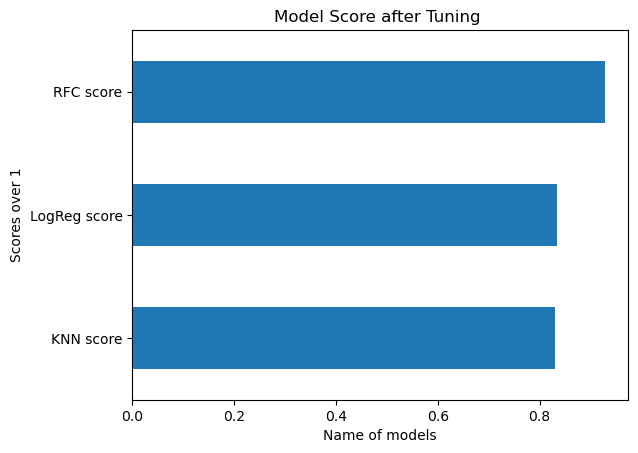

In [46]:
tunned_scores_df = pd.DataFrame(tunned_scores_dict, index=[0])
tunned_scores_df.T.plot.barh(title="Model Score after Tuning ", legend=False)
plt.xlabel("Name of models")
plt.ylabel("Scores over 1");

#### Could see that...still the RandomForestClassifier is doing so well and even less well after tuning, so we'll stick to the RandomForestClassifier without Tunned

## GridSearchCV for `RandomForestClassifier`

In [47]:
# random_ft_model_grid_search = GridSearchCV(RandomForestClassifier(),
#                                           param_grid=random_ft_grid,
#                                           cv=5)
# random_ft_model_grid_search.fit(X_train, y_train)
# random_ft_model_grid_search.score(X_test, y_test)

# Model Evaluation with `RandomForestClassifier` 

In [48]:
# Creating the predicted values of the target column
y_preds = random_ft_model.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 405 out of 405 | elapsed:    0.7s finished


In [49]:
y_preds[:10]

array([0, 0, 1, 0, 1, 0, 0, 1, 0, 0], dtype=int64)

In [50]:
y_test.head(10)

37979    0
9911     0
43386    1
13822    0
44810    1
18495    0
25555    0
13316    1
12929    1
28374    0
Name: target, dtype: int64

### Comparing Truth values to actual vakues with Confusion Matrix


In [70]:
conf_matrix_tab = pd.crosstab(y_test, y_preds)
print(confusion_matrix(y_test, y_preds))

[[6794  196]
 [ 452 1558]]


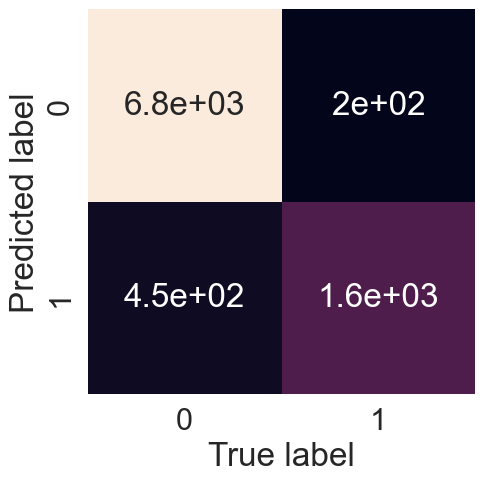

In [72]:
# Function to plot Confusion matrix
sns.set(font_scale=2)

def conf_matrix(y_test, y_preds):
    fig, ax = plt.subplots(figsize=(5, 5))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                      annot=True,
                      cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")

conf_matrix(y_test, y_preds)

#### Classification report on the model

In [110]:
# Fitting the model to `RandomForestClassifier()` without Hyperparameter Tuning 
np.random.seed(42)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
# Classification report on the model
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      6990
           1       0.89      0.78      0.83      2010

    accuracy                           0.93      9000
   macro avg       0.91      0.87      0.89      9000
weighted avg       0.93      0.93      0.93      9000



In [111]:
# Proper classification report with cross-validation K-Fold
# cross validation recall
recall = cross_val_score(clf,
                     X,
                     y,
                     cv=5, scoring="recall")
recall_mean = np.mean(acc)
recall_mean

0.7615999999999999

In [112]:
# cross valiation f1
f1_score = cross_val_score(clf,
                          X, 
                          y,
                          cv=5, scoring="f1")
f1_mean = np.mean(f1_score)
f1_mean

0.8166962513685194

In [113]:
# cross validation accuracy
accuracy = cross_val_score(clf,
                          X,
                          y,
                          cv=5, scoring="accuracy")
accuracy_mean = np.mean(accuracy)
accuracy_mean

0.9248888888888889

In [114]:
#  cross validation precision
precision =  cross_val_score(clf,
                            X,
                            y,
                            cv=5, scoring="precision")
precision_mean = np.mean(precision)
precision_mean

0.8803371932855077

In [115]:
# Gathering score metrics in a Pandas DataFrame
cv_metrics = pd.DataFrame({"Prec. Score": precision_mean,
                          "Recall Score": recall_mean,
                          "F1 Score": f1_mean,
                          "Acc Score": accuracy_mean}, index=[0])
cv_metrics

Prec. Score  Recall Score  F1 Score  Acc Score
0     0.880337        0.7616  0.816696   0.924889

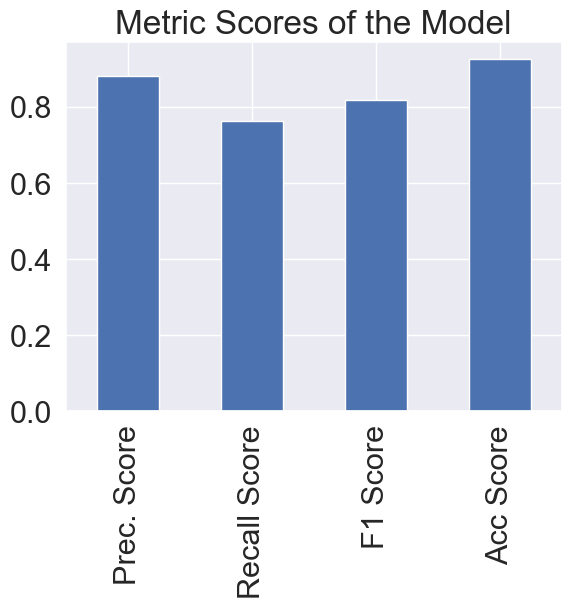

In [116]:
# Plotting to visualize the metrics score

cv_metrics.T.plot.bar(title="Metric Scores of the Model", legend=False);

# Feature Importance

In [137]:
# Checking for Feature Importance of the model, hence another way to ask which instance best contribute to model prediction
clf.feature_importances_

array([0.02904198, 0.11777297, 0.02659972, 0.05777436, 0.14654525,
       0.14387593, 0.0239939 , 0.05409474, 0.0056322 , 0.00576181,
       0.00089925, 0.00544546, 0.00482845, 0.01851937, 0.00048945,
       0.01022091, 0.03239191, 0.00838496, 0.00594636, 0.00837571,
       0.00834147, 0.00493404, 0.00664786, 0.12951828, 0.13277691,
       0.00553538, 0.00565135])

In [138]:
feature_importance = dict(zip(main_df.columns, clf.feature_importances_))
feature_importance

{'age': 0.029041984909777004,
 'income': 0.1177729716419386,
 'exp': 0.026599718676409485,
 'loan_amnt': 0.05777436438016499,
 'loan_int_rate': 0.14654524997917834,
 'loan_percent_income': 0.14387592923297884,
 'cred_hist': 0.023993898178639804,
 'credit_score': 0.054094736491414774,
 'target': 0.005632201680158809,
 'edu_lev_Associate': 0.005761807525891394,
 'edu_lev_Bachelor': 0.0008992491235277844,
 'edu_lev_Doctorate': 0.005445463697533637,
 'edu_lev_High School': 0.004828445983200026,
 'edu_lev_Master': 0.018519372177019194,
 'home_status_MORTGAGE': 0.0004894499441741654,
 'home_status_OTHER': 0.010220914873006004,
 'home_status_OWN': 0.032391911101165,
 'home_status_RENT': 0.00838496277863547,
 'loan_intent_DEBTCONSOLIDATION': 0.005946360254970769,
 'loan_intent_EDUCATION': 0.00837571012849098,
 'loan_intent_HOMEIMPROVEMENT': 0.008341471044745327,
 'loan_intent_MEDICAL': 0.004934044308521315,
 'loan_intent_PERSONAL': 0.00664785606878172,
 'loan_intent_VENTURE': 0.129518283966759

<Axes: title={'center': 'Feature Importance'}>

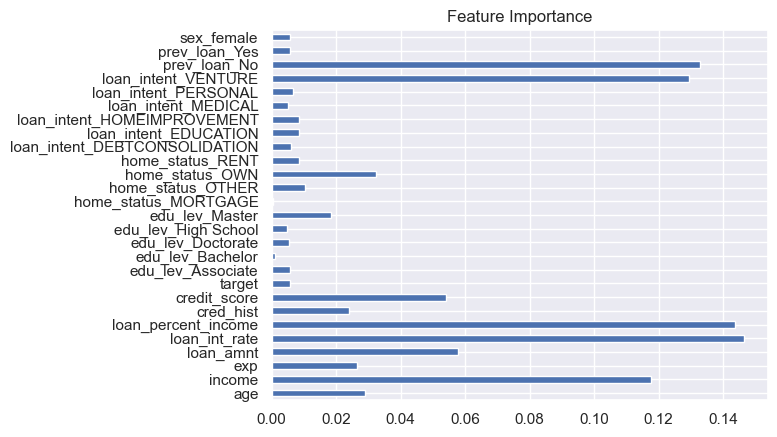

In [139]:
# Plotting/Visualizing the Feature Importance
sns.set(font_scale=1.0)
feature_impoertance_df = pd.DataFrame(feature_importance, index=[0])
feature_impoertance_df.T.plot.barh(title="Feature Importance", legend=False)

# Building and completing the Project

In [141]:
# Saving the model with Pickle
pkl.dump(clf, open("loan_eligibity_predictorXAE616_model_ver2.1.pkl", "wb"))